In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## KNN Classifier with outliers removed

In [2]:
df = pd.read_csv('without_outliers_IF.csv')
df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,label
0,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.0,262.10,17.0,0
1,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,11041.3,21.8,0.90,0.9,20.0,6250.000000,24.0,50.29,18.0,1
2,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.0,126.52,27.0,0
3,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.0,205.47,21.0,0
4,Candidate_29660,1,0,30,13,2,False,2,True,13.50,...,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.0,254.51,13.0,0


In [3]:
X = df.drop(['Unique_ID', 'label'], axis=1)
y = df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train.shape, X_test.shape

((24529, 35), (6133, 35))

In [9]:
iterations = 30
auc_list = []
for i in range(1, iterations+1):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    auc_score = auc(fpr, tpr)
    auc_list.append(auc_score)
    print(f'AUC-ROC for k={i} is: {auc_score}')

AUC-ROC for k=1 is: 0.600405273796742
AUC-ROC for k=2 is: 0.5621441228440992
AUC-ROC for k=3 is: 0.6079921239713839
AUC-ROC for k=4 is: 0.571018621395713
AUC-ROC for k=5 is: 0.5983836433989627
AUC-ROC for k=6 is: 0.5749651152785729
AUC-ROC for k=7 is: 0.5993405883577931
AUC-ROC for k=8 is: 0.5773195689881997
AUC-ROC for k=9 is: 0.5883951407048272
AUC-ROC for k=10 is: 0.5690584055655938
AUC-ROC for k=11 is: 0.5899005769851869
AUC-ROC for k=12 is: 0.5772377036812578
AUC-ROC for k=13 is: 0.5908527833580862
AUC-ROC for k=14 is: 0.575506062272501
AUC-ROC for k=15 is: 0.5892990883210067
AUC-ROC for k=16 is: 0.5762732143948265
AUC-ROC for k=17 is: 0.5891618563784484
AUC-ROC for k=18 is: 0.5777474134179296
AUC-ROC for k=19 is: 0.587196901962398
AUC-ROC for k=20 is: 0.5787190105832576
AUC-ROC for k=21 is: 0.5835556727732075
AUC-ROC for k=22 is: 0.5779854650111544
AUC-ROC for k=23 is: 0.5851765809107312
AUC-ROC for k=24 is: 0.5743418665289983
AUC-ROC for k=25 is: 0.5832092572017153
AUC-ROC for k

<AxesSubplot:>

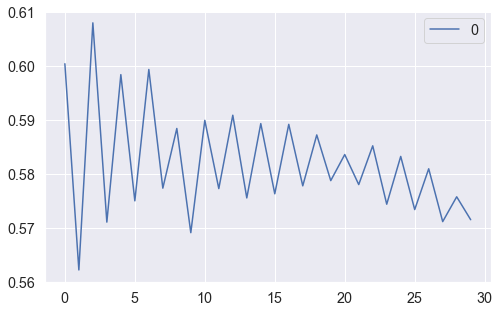

In [10]:
sns.set(font_scale=1.3)

curve = pd.DataFrame(auc_list)
curve.plot(figsize=(8,5))

## KNN Classifier with Outliers

In [11]:
dfo = pd.read_csv('preprocessed_data.csv')
dfo.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.0,262.10,17.0,0
1,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,11041.3,21.8,0.90,0.9,20.0,6250.000000,24.0,50.29,18.0,1
2,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.0,126.52,27.0,0
3,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.0,205.47,21.0,0
4,Candidate_29660,1,0,30,13,2,False,2,True,13.50,...,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.0,254.51,13.0,0


In [12]:
Xo = dfo.drop(['Unique_ID', 'Dependent_Variable'], axis=1)
yo = dfo['Dependent_Variable']

In [13]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.20, random_state = 0)

In [14]:
sc = StandardScaler()
Xo_train = sc.fit_transform(Xo_train)
Xo_test = sc.transform(Xo_test)

In [15]:
iterations = 10
auco_list = []
for i in range(1, iterations+1):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 1)
    classifier.fit(Xo_train, yo_train)
    yo_pred = classifier.predict(Xo_test)
    fpr, tpr, thresholds = roc_curve(yo_test, yo_pred, pos_label=1)
    auc_score = auc(fpr, tpr)
    auco_list.append(auc_score)
    print(f'AUC-ROC for k={i} is: {auc_score}')

AUC-ROC for k=1 is: 0.5963998766249855
AUC-ROC for k=2 is: 0.5648994712740155
AUC-ROC for k=3 is: 0.6053588915125744
AUC-ROC for k=4 is: 0.5738768575777035
AUC-ROC for k=5 is: 0.609158909378355
AUC-ROC for k=6 is: 0.5840249581586784
AUC-ROC for k=7 is: 0.6149125335194072
AUC-ROC for k=8 is: 0.5860097452777877
AUC-ROC for k=9 is: 0.6075557083697812
AUC-ROC for k=10 is: 0.5899730833472383


<AxesSubplot:>

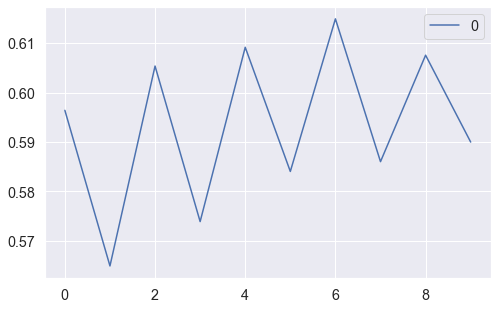

In [17]:
sns.set(font_scale=1.3)

curve = pd.DataFrame(auco_list)
curve.plot(figsize=(8,5))